In [5]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [6]:
df = web.DataReader('AAPL' , data_source='yahoo', start='2010-8-22', end ='2021-8-22')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-08-23,9.000000,8.758929,8.992500,8.778571,414041600.0,7.505835
2010-08-24,8.678571,8.523214,8.666786,8.568929,602565600.0,7.326587
2010-08-25,8.713929,8.471429,8.501429,8.674643,596867600.0,7.416974
2010-08-26,8.776786,8.581429,8.766071,8.581429,466505200.0,7.337275
2010-08-27,8.664643,8.412857,8.633929,8.629286,548391200.0,7.378193
...,...,...,...,...,...,...
2021-08-16,151.190002,146.470001,148.539993,151.119995,103296000.0,150.486649
2021-08-17,151.679993,149.089996,150.229996,150.190002,92229700.0,149.560562
2021-08-18,150.720001,146.149994,149.800003,146.360001,86326000.0,145.746597


In [7]:
df.shape

(2769, 6)

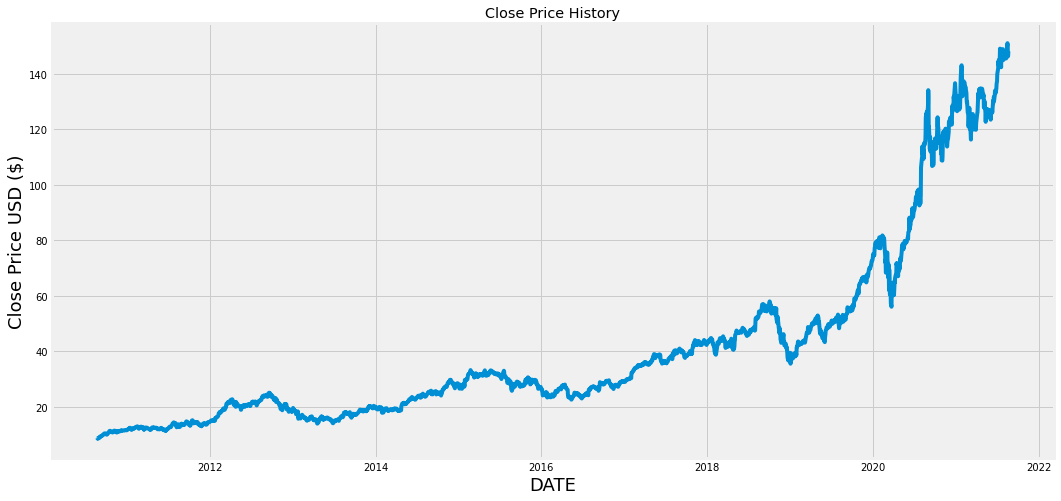

In [8]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('DATE', fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [9]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

2216

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[1.47064779e-03],
       [0.00000000e+00],
       [7.41585784e-04],
       ...,
       [9.66608496e-01],
       [9.68993580e-01],
       [9.79446014e-01]])

In [15]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([1.47064779e-03, 0.00000000e+00, 7.41585784e-04, 8.76865363e-05,
       4.23406821e-04, 6.43877547e-04, 7.94203058e-04, 2.60558198e-03,
       3.06656683e-03, 4.72011400e-03, 4.47959987e-03, 5.75984204e-03,
       5.79742007e-03, 5.88260453e-03, 6.79205045e-03, 7.04759713e-03,
       7.58875559e-03, 9.17966379e-03, 8.87902614e-03, 1.08482435e-02,
       1.09835298e-02, 1.19806689e-02, 1.22737936e-02, 1.31256181e-02,
       1.28349955e-02, 1.17576894e-02, 1.18854628e-02, 1.09785256e-02,
       1.06703617e-02, 9.69828345e-03, 1.22788112e-02, 1.23414368e-02,
       1.23489564e-02, 1.35640575e-02, 1.38872473e-02, 1.46839591e-02,
       1.50848205e-02, 1.56284877e-02, 1.87426543e-02, 1.95594095e-02,
       1.74273362e-02, 1.76878937e-02, 1.74348558e-02, 1.69212537e-02,
       1.72644869e-02, 1.70665683e-02, 1.70114490e-02, 1.63625606e-02,
       1.52952695e-02, 1.60969855e-02, 1.73947623e-02, 1.82566152e-02,
       1.96270526e-02, 1.93414342e-02, 1.97147392e-02, 1.90783746e-02,
     

In [16]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [17]:
x_train=np.reshape(x_train , (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2156, 60, 1)

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [19]:
model.compile(optimizer='adam',loss = 'mean_squared_error')


In [20]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

2156/2156 [==============================] - 25s 11ms/step - loss: 1.9481e-04


In [21]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60 , len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [22]:
x_test=np.array(x_test)


In [23]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [26]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

18/18 [==============================] - 0s 8ms/step


In [27]:
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

9.37113640232443

C:\Users\DEBAJY~1\AppData\Local\Temp/ipykernel_25060/1584934229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


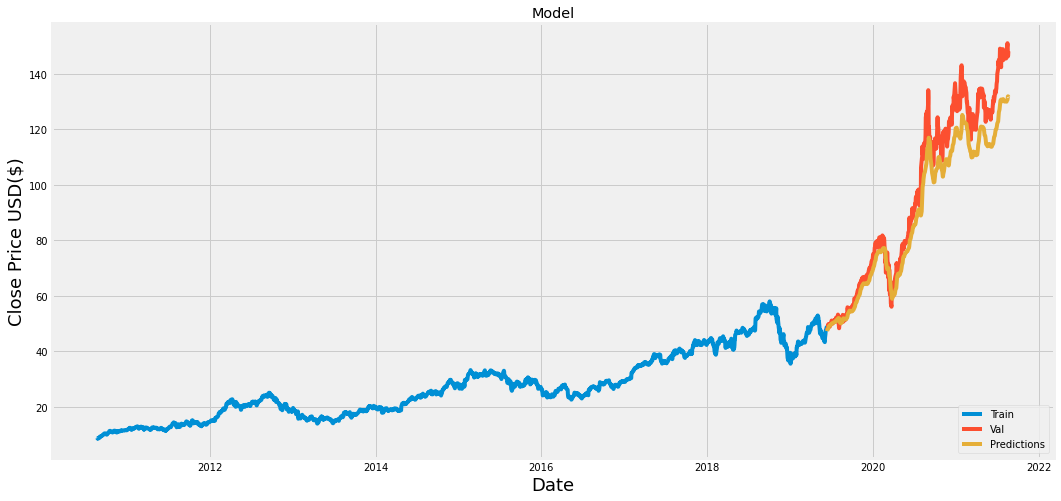

In [28]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [29]:
valid

,Close,Predictions
Date,,
2019-06-13,48.537498,47.289444
2019-06-14,48.185001,47.738377
2019-06-17,48.472500,48.041069
2019-06-18,49.612499,48.268562
2019-06-19,49.467499,48.561852
...,...,...
2021-08-16,151.119995,130.732864
2021-08-17,150.190002,131.400574
2021-08-18,146.360001,131.959122


In [31]:
apple_quote= web.DataReader('AAPL',data_source='yahoo',start='2010-08-15',end='2021-08-15')
new_df=apple_quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test =[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 15ms/step
[[130.73286]]


In [32]:
apple_quote2= web.DataReader('AAPL',data_source='yahoo',start='2021-08-16',end='2021-08-16')
print(apple_quote2['Close'])

Date
2021-08-16    151.119995
Name: Close, dtype: float64
